In [12]:
import warnings
import pandas as pd
import os
import numpy as np
import scattertext as st
import matplotlib.pyplot as plt
#import spacy
from pprint import pprint
from mlxtend.frequent_patterns import apriori
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from sklearn.cluster import DBSCAN

In [13]:
warnings.filterwarnings("ignore")

In [14]:
ASV = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv")
ASV.head(3)

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,In the beginning God created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,And the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"And God said, Let there be light: and there wa..."


In [15]:
import nltk
nltk.download("stopwords")
ASV['text'] = ASV['text'].str.lower()
ASV.text = ASV.text.str.replace('\d+', '')
ASV['text'] = ASV['text'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
ASV['text'] = ASV['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ASV.text = ASV.text.str.replace('\d+', '')
ASV.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venu2064\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,beginning god created heavens earth
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,earth waste void darkness upon face deep spiri...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,god said let light light
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,god saw light good god divided light darkness
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,god called light day darkness called night eve...


In [16]:
#text change into vectors 
vec = TfidfVectorizer()
X = vec.fit_transform(ASV['text'].values.astype('str'))
text = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [17]:
ASV = pd.merge(ASV, text, left_index=True, right_index=True)
ASV = ASV.drop('text',axis=1)
ASV.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aarons,abaddon,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_ASV = ASV.drop(ASV.ix[:,0:7].head(0).columns, axis=1)
X_ASV.head(3)

,aaron,aarons,abaddon,abagtha,abanah,abarim,abase,abased,abasing,abated,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:

pca = PCA(n_components=2)
pca.fit(X_ASV)
X_ASV_50PCA = pca.transform(X_ASV)

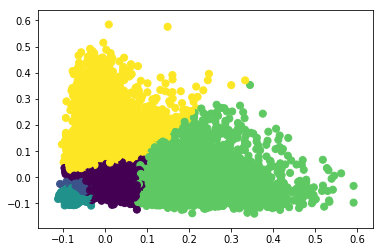

In [36]:
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_ASV_50PCA)
plt.scatter(X_ASV_50PCA[:, 0], X_ASV_50PCA[:, 1], c=labels,
            s=50, cmap='viridis');

In [34]:
#Grouping Old Testtament and New Testament into clusters and 7sections
labels = pd.DataFrame(labels)
labels.columns = ['number_group']
types = pd.merge(ASV, labels, left_index=True, right_index=True)
types.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aarons,abaddon,...,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim,number_group
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [37]:
group_1 = types[types["number_group"]==0]
group_2 = types[types["number_group"]==1]
group_3 = types[types["number_group"]==2]
group_4 = types[types["number_group"]==3]
group_5 = types[types["number_group"]==4]

group_1 = group_1.iloc[:,[2,12660]]
group_2 = group_2.iloc[:,[2,12660]]
group_3 = group_3.iloc[:,[2,12660]]
group_4 = group_4.iloc[:,[2,12660]]
group_5 = group_5.iloc[:,[2,12660]]

In [38]:
group_1_count_OT= group_1[group_1['Testaments'] == 'OT'].count()['Testaments']
group_1_count_NT= group_1[group_1['Testaments'] == 'NT'].count()['Testaments']
group_2_count_OT= group_2[group_2['Testaments'] == 'OT'].count()['Testaments']
group_2_count_NT= group_2[group_2['Testaments'] == 'NT'].count()['Testaments']
group_3_count_OT= group_3[group_3['Testaments'] == 'OT'].count()['Testaments']
group_3_count_NT= group_3[group_3['Testaments'] == 'NT'].count()['Testaments']
group_4_count_OT= group_4[group_4['Testaments'] == 'OT'].count()['Testaments']
group_4_count_NT= group_4[group_4['Testaments'] == 'NT'].count()['Testaments']
group_5_count_OT= group_5[group_5['Testaments'] == 'OT'].count()['Testaments']
group_5_count_NT= group_5[group_5['Testaments'] == 'NT'].count()['Testaments']

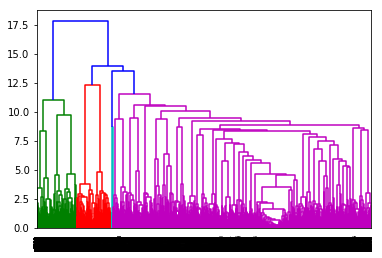

In [24]:
hier = linkage(X_ASV_50PCA, 'ward')
dend = dendrogram(hier)

In [24]:
grouping = {'groups': ["1 Old","1 New","group_2_count_OT",
               "group_2_count_NT","group_3_count_OT","group_3_count_NT","group_4_count_OT",
               "group_4_count_NT","group_5_count_OT","group_5_count_NT"],
     'counts': [group_1_count_OT,group_1_count_NT,group_2_count_OT,group_2_count_NT,group_3_count_OT,
               group_3_count_NT,group_4_count_OT,group_4_count_NT,group_5_count_OT,group_5_count_NT]}

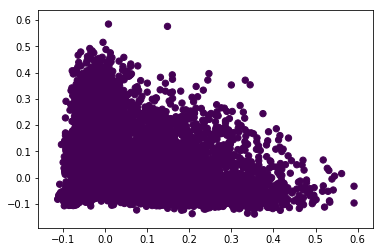

In [48]:

v = DBSCAN(eps=0.3, min_samples=10,metric='cosine').fit(X_ASV_50PCA)
core_samples_mask = np.zeros_like(v.labels_, dtype=bool)
core_samples_mask[v.core_sample_indices_] = True
labels = v.labels_
plt.scatter(X_ASV_50PCA[:, 0], X_ASV_50PCA[:, 1], c=labels, s=40, cmap='viridis')

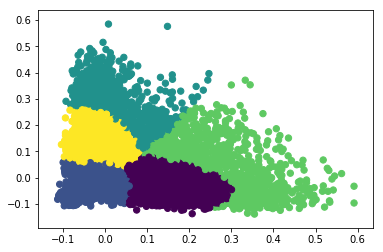

In [28]:
VAR = GMM(n_components=5).fit(X_ASV_50PCA)
labels = VAR.predict(X_ASV_50PCA)
plt.scatter(X_ASV_50PCA[:, 0], X_ASV_50PCA[:, 1], c=labels, s=40, cmap='viridis');

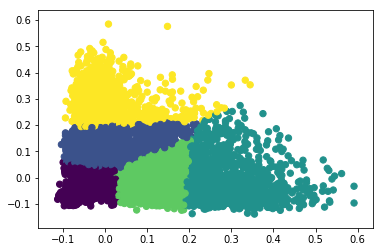

In [30]:
VAR1 = MiniBatchKMeans(n_clusters=5).fit(X_ASV_50PCA)
labels = VAR1.labels_
plt.scatter(X_ASV_50PCA[:, 0], X_ASV_50PCA[:, 1], c=labels, s=40, cmap='viridis')

In [43]:

section = types.Sections.unique()
clusts = types.number_group.unique()
df= pd.DataFrame(data=grouping)
df.sort_values(by = 'counts',ascending= False)

,groups,counts
2,group_2_count_OT,14116
3,group_2_count_NT,5939
0,1 Old,4216
6,group_4_count_OT,3050
4,group_3_count_OT,1763
7,group_4_count_NT,1097
1,1 New,612
5,group_3_count_NT,310
8,group_5_count_OT,0
9,group_5_count_NT,0


In [46]:

first = []
second = []
third = []

for x in section :
    x=x
    for j in clusts :
        j=j
        a = types[types["number_group"]== j]
        b = a[a['Sections'] == x].count()['Sections']
        
        first.append({x})
        second.append({j})
        third.append({b})

In [47]:
first = pd.DataFrame(first)
first.columns = ['Section']
second = pd.DataFrame(second)
second.columns = ['Cluster']
third = pd.DataFrame(third)
third.columns = ['Count']

df2 = pd.merge(first, second, left_index=True, right_index=True)
df2 = pd.merge(df2, third, left_index=True, right_index=True)
df2.sort_values(by = 'Count', ascending= False)

,Section,Cluster,Count
5,History,0,5282
20,Gospels,0,3299
10,Wisdom,0,2879
0,Law,0,2754
15,Prophets,0,2512
25,Paul,0,1675
16,Prophets,1,1144
1,Law,1,1054
12,Wisdom,3,985
2,Law,3,947
